EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_health_df = pd.read_csv("Music & Mental Health.csv")

In [3]:
music_health_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

I can see that there are some missing values, that I will have to deal with in a second moment. 

I don't like the names of the columns with spaces, I replace the spaces with _. I make also further changes, to simplify the names of the columns.

In [5]:
music_health_df.columns = [col.replace(" ", "_").replace("Frequency", "Freq").replace("[","").replace("]","") for col in music_health_df.columns]

I remove the first column, because it is irrelevant.

In [6]:
music_health_df.drop(columns = "Timestamp", axis = 1, inplace = True)

I decide to remove also other columns, that are not useful for the study of the dataset.

In [7]:
music_health_df.Permissions.unique() #column full of a unique value

array(['I understand.'], dtype=object)

In [8]:
delate_col = ["Permissions", "BPM", "Foreign_languages", "Primary_streaming_service"] #list of columns to delate
for col in delate_col:
    music_health_df.drop([col], axis = 1, inplace = True)

In [9]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    735 non-null    float64
 1   Hours_per_day          736 non-null    float64
 2   While_working          733 non-null    object 
 3   Instrumentalist        732 non-null    object 
 4   Composer               735 non-null    object 
 5   Fav_genre              736 non-null    object 
 6   Exploratory            736 non-null    object 
 7   Freq_Classical         736 non-null    object 
 8   Freq_Country           736 non-null    object 
 9   Freq_EDM               736 non-null    object 
 10  Freq_Folk              736 non-null    object 
 11  Freq_Gospel            736 non-null    object 
 12  Freq_Hip_hop           736 non-null    object 
 13  Freq_Jazz              736 non-null    object 
 14  Freq_K_pop             736 non-null    object 
 15  Freq_L

In [10]:
backup_dataset = music_health_df.copy() #I create a backup copy of the dataset

Now I deal with the missing values:

In [11]:
music_health_df[music_health_df["Music_effects"].isnull()].index

Int64Index([0, 1, 161, 168, 338, 441, 532, 561], dtype='int64')

In [12]:
music_health_df.drop(music_health_df[music_health_df["Music_effects"].isnull()].index, inplace = True) 
#I delete the rows that don't have a value in the last column, because they are irrelevant: I won't be able to use them for my study.

In [13]:
print(music_health_df[music_health_df["Age"].isnull()].index)
print(music_health_df[music_health_df["While_working"].isnull()].index)
print(music_health_df[music_health_df["Instrumentalist"].isnull()].index)
#position of the null vales for these columns

Int64Index([12], dtype='int64')
Int64Index([57, 426], dtype='int64')
Int64Index([223, 408, 572], dtype='int64')


In [14]:
null_col = ["While_working", "Instrumentalist"]
for col in null_col:
    music_health_df.drop(music_health_df[music_health_df[col].isnull()].index, inplace = True)

In [15]:
#I replace the remaining missing value in the column "Age" with the mean of this column(rounded)
music_health_df["Age"].fillna(round(music_health_df["Age"].mean()), inplace = True)

In [16]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    723 non-null    float64
 1   Hours_per_day          723 non-null    float64
 2   While_working          723 non-null    object 
 3   Instrumentalist        723 non-null    object 
 4   Composer               723 non-null    object 
 5   Fav_genre              723 non-null    object 
 6   Exploratory            723 non-null    object 
 7   Freq_Classical         723 non-null    object 
 8   Freq_Country           723 non-null    object 
 9   Freq_EDM               723 non-null    object 
 10  Freq_Folk              723 non-null    object 
 11  Freq_Gospel            723 non-null    object 
 12  Freq_Hip_hop           723 non-null    object 
 13  Freq_Jazz              723 non-null    object 
 14  Freq_K_pop             723 non-null    object 
 15  Freq_L

Now I don't have missing value.

In [17]:
backup_dataset2 = music_health_df.copy()

Since, a lot of columns have similar values, that represent the frequences of listening of the different genres, I substitute the object values with numerical values.

In [18]:
music_health_df.Freq_Classical.unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

In [19]:
for i in music_health_df.columns[7:23]:
  #each label correspond to a number
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[0], i] = 0
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[1], i] = 2
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[2], i] = 1
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[3], i] = 3

In [20]:
music_health_df[music_health_df.columns[7:23]] = music_health_df[music_health_df.columns[7:23]].astype(int)
#transforming the column into an integer column

I repeat the same process for the columns with values "Yes" and "No" and for the column Music Effects.

In [21]:
for i in music_health_df.columns[2:5]:
  music_health_df.loc[music_health_df[i] == "Yes", i] = 0
  music_health_df.loc[music_health_df[i] == "No", i] = 1

In [22]:
music_health_df.loc[music_health_df["Exploratory"] == "Yes", "Exploratory"] = 0
music_health_df.loc[music_health_df["Exploratory"] == "No", "Exploratory"] = 1

In [23]:
music_health_df[music_health_df.columns[2:5]] = music_health_df[music_health_df.columns[2:5]].astype(int)
music_health_df["Exploratory"] = music_health_df["Exploratory"].astype(int)

In [24]:
music_health_df.Music_effects.unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [25]:
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[0], "Music_effects"] = 0
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[1], "Music_effects"] = 1
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[2], "Music_effects"] = 2

In [26]:
music_health_df["Music_effects"] = music_health_df["Music_effects"].astype(int)

In [27]:
music_health_df[music_health_df.columns[0:2]] = music_health_df[music_health_df.columns[0:2]].astype(int)
music_health_df[music_health_df.columns[23:27]] = music_health_df[music_health_df.columns[23:27]].astype(int)

In [28]:
music_health_df.index = [x for x in range(len(music_health_df.index))]
#replacing the indexes of the rows of the dataset, starting from 0

In [29]:
music_health_df.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
0,18,4,1,1,1,Video game music,1,0,0,0,...,0,0,0,0,0,7,7,10,2,0
1,61,2,0,1,0,Jazz,0,2,0,2,...,2,2,2,2,2,9,7,3,3,1
2,18,4,0,1,1,R&B,0,0,0,1,...,2,1,1,2,1,7,2,5,9,1
3,18,5,0,0,0,Jazz,0,1,2,2,...,1,1,1,1,2,8,8,7,7,1
4,18,3,0,0,1,Video game music,0,2,0,1,...,0,3,2,2,3,4,8,6,0,1


In [30]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 722
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    723 non-null    int32 
 1   Hours_per_day          723 non-null    int32 
 2   While_working          723 non-null    int32 
 3   Instrumentalist        723 non-null    int32 
 4   Composer               723 non-null    int32 
 5   Fav_genre              723 non-null    object
 6   Exploratory            723 non-null    int32 
 7   Freq_Classical         723 non-null    int32 
 8   Freq_Country           723 non-null    int32 
 9   Freq_EDM               723 non-null    int32 
 10  Freq_Folk              723 non-null    int32 
 11  Freq_Gospel            723 non-null    int32 
 12  Freq_Hip_hop           723 non-null    int32 
 13  Freq_Jazz              723 non-null    int32 
 14  Freq_K_pop             723 non-null    int32 
 15  Freq_Latin             

In [31]:
music_health_df.describe()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.00000,723.000000,723.000000,723.00000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,25.149378,3.542185,0.211618,0.679115,0.828492,0.283541,1.334716,1.323651,1.691563,1.116183,...,1.311203,1.51314,1.504841,1.580913,1.66390,5.838174,4.802213,3.727524,2.645920,0.792531
std,11.928682,3.036587,0.408738,0.467140,0.377213,0.451029,0.990955,1.335777,0.926838,1.051473,...,0.867207,1.20285,1.169045,1.048688,1.02282,2.786509,3.016280,3.082279,2.844871,0.460157
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.00000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,21.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.00000,2.000000,1.000000,2.00000,6.000000,5.000000,3.000000,2.000000,1.000000
75%,28.000000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,...,2.000000,3.00000,3.000000,3.000000,3.00000,8.000000,7.000000,6.000000,5.000000,1.000000
max,89.000000,24.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.00000,3.000000,3.000000,3.00000,10.000000,10.000000,10.000000,10.000000,2.000000


Now I study the correlation between the columns of the dataset, removing the column "Fav_genre" that is non numerical.

In [32]:
corr_matrix = music_health_df[music_health_df.columns[music_health_df.columns != "Fav_genre"]].corr()
corr_matrix

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
Age,1.000000,-0.039061,0.071911,0.123198,0.027556,0.179529,0.097468,0.073454,0.033989,0.102084,...,0.046780,0.087608,0.035902,0.060593,0.052594,-0.183197,-0.114584,0.008228,-0.131003,-0.075848
Hours_per_day,-0.039061,1.000000,-0.287855,0.020297,-0.137567,-0.137684,-0.029094,0.022239,-0.051718,0.090426,...,-0.090987,0.012077,-0.032734,-0.082516,0.062767,0.046722,0.099280,0.136558,0.113802,0.003299
While_working,0.071911,-0.287855,1.000000,0.080485,0.047078,0.139879,-0.055436,-0.087566,0.059195,-0.057286,...,0.060120,-0.012706,0.028288,0.032701,-0.001911,-0.036775,-0.055878,-0.034423,-0.085553,-0.127082
Instrumentalist,0.123198,0.020297,0.080485,1.000000,0.402519,0.070874,-0.252363,-0.026442,-0.004982,0.008331,...,-0.012995,0.076532,0.099224,-0.026091,-0.078195,-0.031435,-0.006769,-0.030988,-0.019955,-0.078175
Composer,0.027556,-0.137567,0.047078,0.402519,1.000000,0.098986,-0.094467,-0.073852,0.002986,-0.075405,...,-0.027143,-0.016394,0.067843,-0.006886,-0.002428,-0.004041,-0.054202,-0.095047,-0.015367,-0.069629
Exploratory,0.179529,-0.137684,0.139879,0.070874,0.098986,1.000000,-0.060790,-0.067470,0.060399,-0.113367,...,0.050295,-0.117931,0.064377,-0.014897,-0.069353,-0.019645,-0.059511,-0.056931,-0.029591,-0.116578
Freq_Classical,0.097468,-0.029094,-0.055436,-0.252363,-0.094467,-0.060790,1.000000,0.112667,0.034144,0.118150,...,0.026897,-0.004857,-0.057593,0.007223,-0.050101,-0.056097,-0.010257,0.071619,-0.008997,-0.029744
Freq_Country,0.073454,0.022239,-0.087566,-0.026442,-0.073852,-0.067470,0.112667,1.000000,-0.000924,0.265083,...,-0.009352,0.143893,0.022943,0.005998,-0.025701,0.049069,0.009722,0.021785,0.059356,0.007994
Freq_EDM,0.033989,-0.051718,0.059195,-0.004982,0.002986,0.060399,0.034144,-0.000924,1.000000,0.039664,...,-0.019992,-0.005677,-0.008207,0.005050,0.001534,-0.030079,-0.049101,-0.044489,-0.033597,-0.062565
Freq_Folk,0.102084,0.090426,-0.057286,0.008331,-0.075405,-0.113367,0.118150,0.265083,0.039664,1.000000,...,-0.073124,0.126918,0.026584,0.006536,-0.046063,0.078279,0.082370,0.077731,0.022569,-0.015952


<AxesSubplot: >

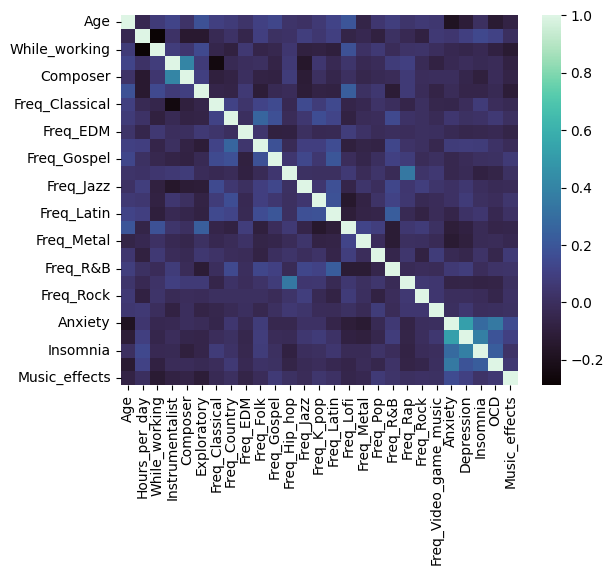

In [33]:
sns.heatmap(corr_matrix, cmap = sns.color_palette("mako", as_cmap=True))

I notice that the values of correlation are generally very low, suggesting that there is not any strong linear correlation between the couples of columns. However, I search for the maximum positive and negative values of correlation.

In [34]:
corr_sequence = corr_matrix.unstack()
sorted_corr_sequence = corr_sequence.sort_values(kind = "quicksort") #sorting the values, I can find the minimum and the maximum
sorted_corr_sequence[0:1], sorted_corr_sequence[-29:-28]

(Hours_per_day  While_working   -0.287855
 dtype: float64,
 Depression  Anxiety    0.520878
 dtype: float64)

PLOTS

Firstly, I create histograms corresponding to the frequence of listening to music.

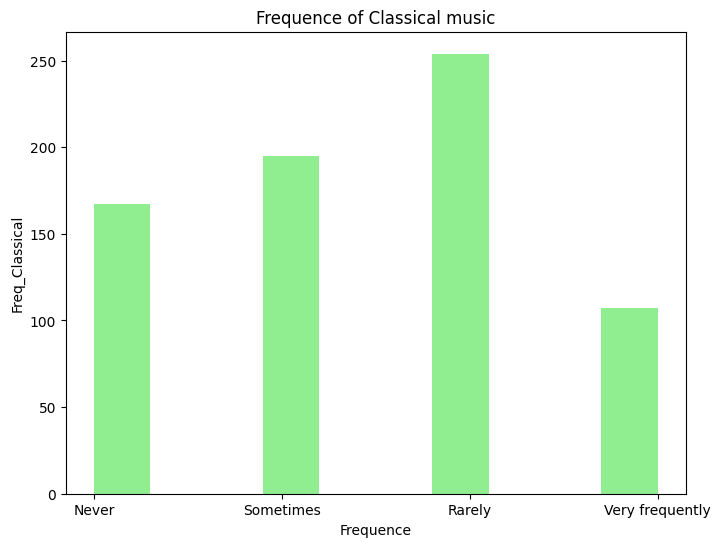

In [35]:
#an histogram for the first column corresponding to the listening frequence of a music genre
plt.figure(figsize = (8,6))
plt.hist(backup_dataset2.Freq_Classical, color = "lightgreen")
plt.xlabel("Frequence")
plt.ylabel("Freq_Classical")
plt.title("Frequence of Classical music")
plt.show()
#The idea is to use this implementation to create a selectbox in streamlit and for each choice print the corresponding graph

Then, I use pie charts to compare the frequencies of listening to different genres of music.

In [36]:
#a list with all the values that correspond to the number of people for each listening frequence
frequences = []
for col in music_health_df.columns[7:23]:
    freq = dict(backup_dataset2[col].value_counts())
    #a dictionary for every music genre
    frequences.append(freq) #the list is a list of dictionaries
rarely_list = [frequences[i]["Rarely"] for i in range(len(frequences))]
never_list = [frequences[i]["Never"] for i in range(len(frequences))]
sometimes_list = [frequences[i]["Sometimes"] for i in range(len(frequences))]
very_frequently_list = [frequences[i]["Very frequently"] for i in range(len(frequences))]

In [37]:
frequences

[{'Rarely': 254, 'Sometimes': 195, 'Never': 167, 'Very frequently': 107},
 {'Never': 335, 'Rarely': 230, 'Sometimes': 109, 'Very frequently': 49},
 {'Never': 298, 'Rarely': 192, 'Sometimes': 145, 'Very frequently': 88},
 {'Never': 286, 'Rarely': 218, 'Sometimes': 143, 'Very frequently': 76},
 {'Never': 526, 'Rarely': 133, 'Sometimes': 50, 'Very frequently': 14},
 {'Sometimes': 214, 'Rarely': 211, 'Never': 176, 'Very frequently': 122},
 {'Never': 255, 'Rarely': 244, 'Sometimes': 172, 'Very frequently': 52},
 {'Never': 411, 'Rarely': 174, 'Very frequently': 71, 'Sometimes': 67},
 {'Never': 436, 'Rarely': 171, 'Sometimes': 85, 'Very frequently': 31},
 {'Never': 275, 'Rarely': 206, 'Sometimes': 158, 'Very frequently': 84},
 {'Never': 257, 'Rarely': 189, 'Very frequently': 146, 'Sometimes': 131},
 {'Very frequently': 272, 'Sometimes': 257, 'Rarely': 140, 'Never': 54},
 {'Never': 223, 'Rarely': 209, 'Sometimes': 176, 'Very frequently': 115},
 {'Rarely': 212, 'Never': 195, 'Sometimes': 191, '

In [38]:
rarely_list

[254, 230, 192, 218, 133, 211, 244, 174, 171, 206, 189, 140, 209, 212, 95, 195]

In [39]:
colors = ["Aqua", "Red", "Blue", "Green", "DarkMagenta", "Linen", "Gray", "HotPink", "Brown", "LightSeaGreen", "Olive", 
          "Orchid", "Thistle", "SpringGreen", "Peru", "Yellow"] #list of colors for the pie charts

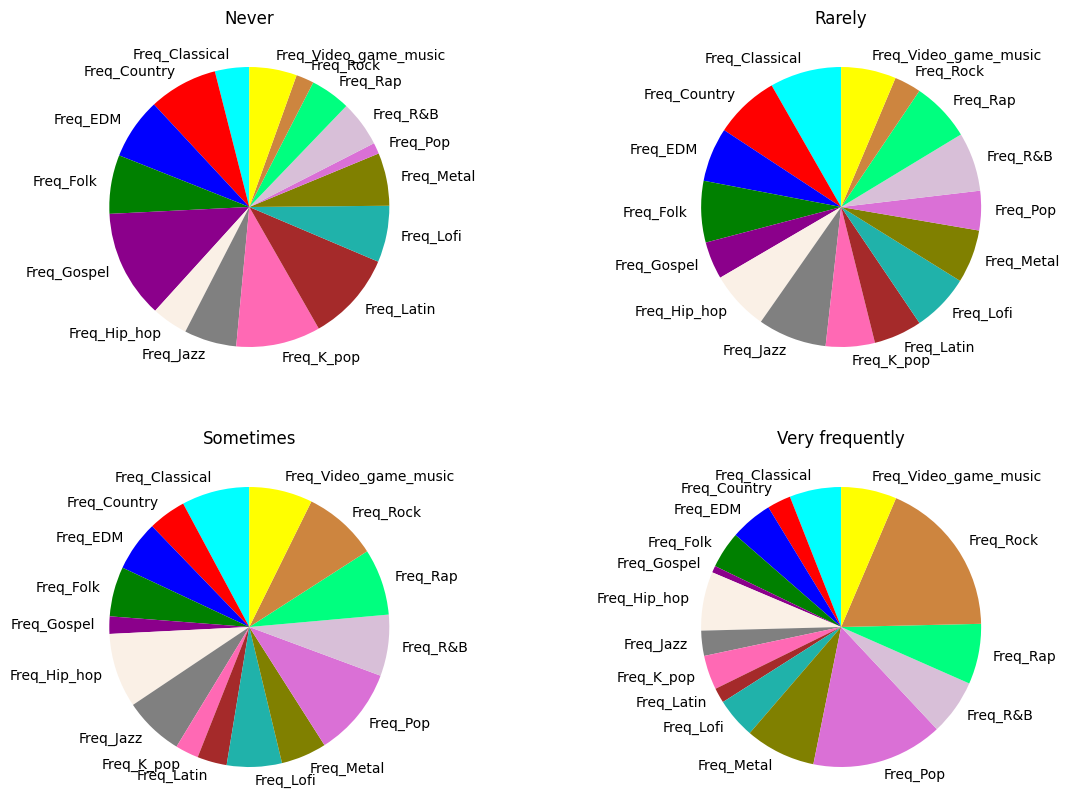

In [40]:
#creation of the pie charts
fig,axs = plt.subplots(2, 2, figsize = (14,10)) 
axs[0,0].pie(never_list, startangle = 90, labels = music_health_df.columns[7:23], colors = colors)
axs[0,0].title.set_text("Never")
axs[0,1].pie(rarely_list, startangle = 90,labels = music_health_df.columns[7:23], colors = colors)
axs[0,1].title.set_text("Rarely")
axs[1,0].pie(sometimes_list, startangle = 90, labels = music_health_df.columns[7:23], colors = colors)
axs[1,0].title.set_text("Sometimes")
axs[1,1].pie(very_frequently_list, startangle = 90, labels = music_health_df.columns[7:23], colors = colors)
axs[1,1].title.set_text("Very frequently")
plt.show()

The following graph is...

In [41]:
#creation of masks to create groups according to the age of the people
mask_1 = (music_health_df["Age"] < 20) | (music_health_df["Age"] == 20)
mask_2 = (music_health_df["Age"] > 20) & (music_health_df["Age"] < 40) | (music_health_df["Age"] == 40)
mask_3 = (music_health_df["Age"] > 40) & (music_health_df["Age"] < 60) | (music_health_df["Age"] == 60)
mask_4 = (music_health_df["Age"] > 60)

In [42]:
#creation of a new column that represents the age group of each row
music_health_df.loc[mask_1,"Age_group"] = "under 20"
music_health_df.loc[mask_2, "Age_group"] = "21-40"
music_health_df.loc[mask_3, "Age_group"] = "41-60"
music_health_df.loc[mask_4, "Age_group"] = "over 60"


In [43]:
x = [music_health_df.loc[music_health_df["Age_group"] == "under 20","Music_effects"], music_health_df.loc[music_health_df["Age_group"] == "21-40","Music_effects"],
music_health_df.loc[music_health_df["Age_group"] == "41-60","Music_effects"], music_health_df.loc[music_health_df["Age_group"] == "over 60","Music_effects"]]

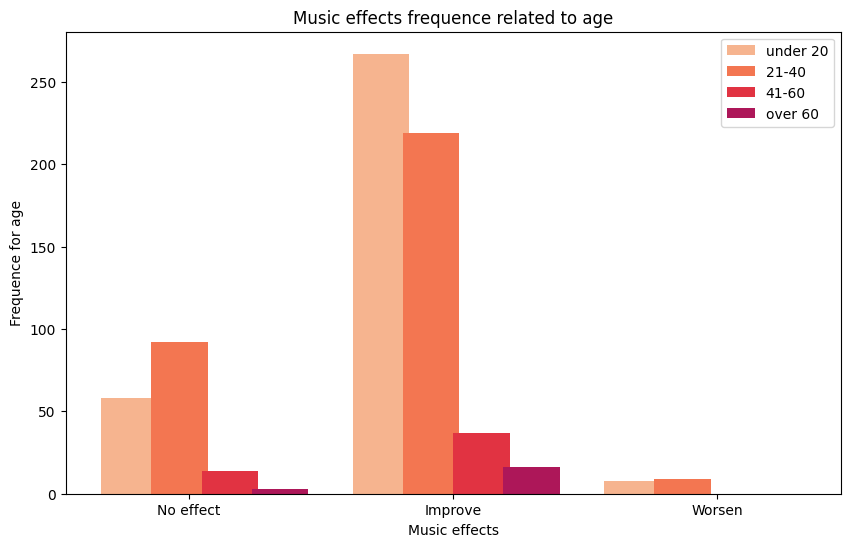

In [44]:
plt.figure(figsize = (10,6))
plt.hist(x, bins = 3, label = ["under 20", "21-40", "41-60", "over 60"], width = 0.15, color = sns.color_palette("rocket")[-1:-5:-1])
plt.xticks([0.3,1,1.7], ["No effect", "Improve", "Worsen"])
plt.xlabel("Music effects")
plt.ylabel("Frequence for age")
plt.title("Music effects frequence related to age")
plt.legend()
plt.show()

In [45]:
music_health_df["Age_group"].value_counts() #evaluation of the frequence of each value of age group

under 20    333
21-40       320
41-60        51
over 60      19
Name: Age_group, dtype: int64

Creation of a set of histograms, showing the frequence of various levels of Anxiety, Depression, Insomnia and OCD, 
with a differentiation according to the effects of music on the patients.

In [46]:
music_health_df["Music_effects"].value_counts()

1    539
0    167
2     17
Name: Music_effects, dtype: int64

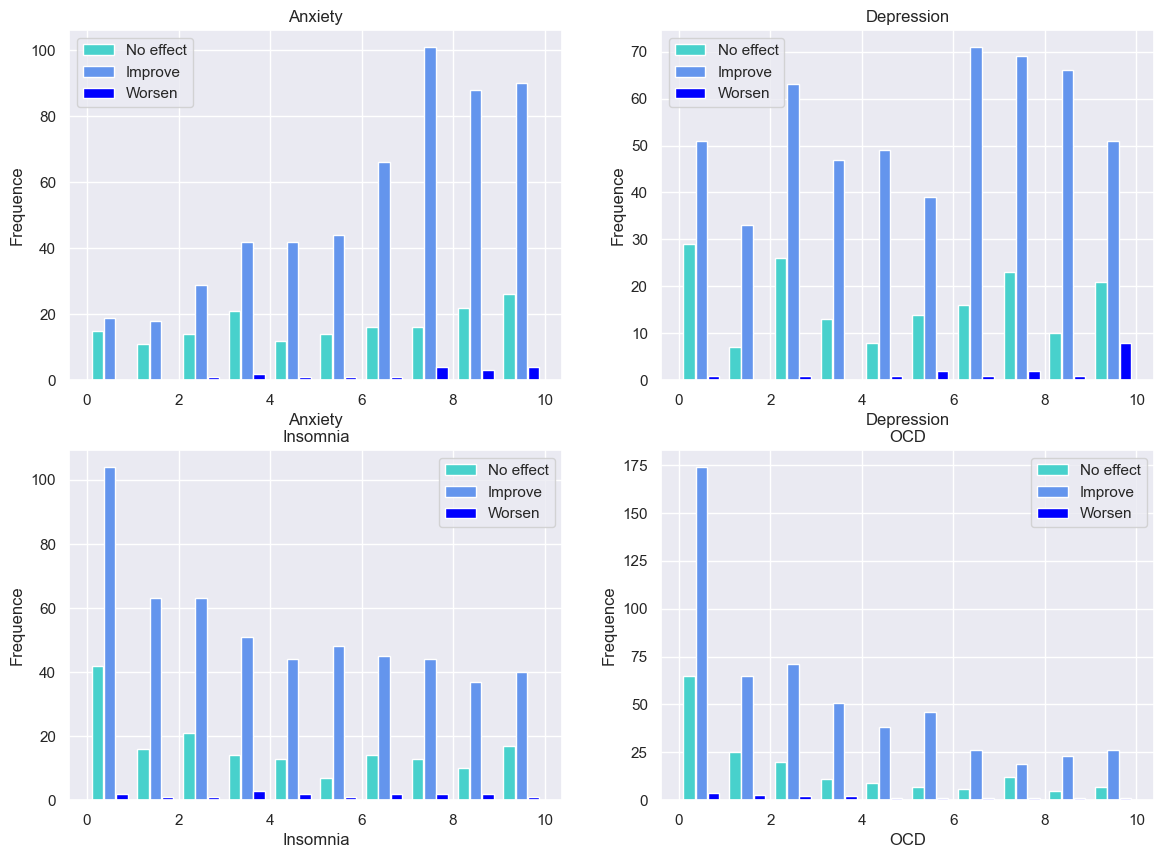

In [47]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize = (14,10))
for i in range(0,2):
    for j in range(2,4):
        if i == 0:
            axs[i,j-2].hist([music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 0,music_health_df.columns[23:27][i+j-2]], music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 1,music_health_df.columns[23:27][i+j-2]], 
            music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 2,music_health_df.columns[23:27][i+j-2]]], color = ["mediumturquoise", "cornflowerblue", "blue"], label = ["No effect", "Improve", "Worsen"], width=0.25)
            axs[i,j-2].title.set_text(music_health_df.columns[23:27][i+j-2])
            axs[i,j-2].set_xlabel(music_health_df.columns[23:27][i+j-2])
            axs[i,j-2].set_ylabel("Frequence")
            axs[i,j-2].legend()
        else:
            axs[i,j-2].hist([music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 0,music_health_df.columns[23:27][i+j-1]], music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 1,music_health_df.columns[23:27][i+j-1]], 
            music_health_df.loc[music_health_df[music_health_df.columns[-2]] == 2,music_health_df.columns[23:27][i+j-1]]], color = ["mediumturquoise", "cornflowerblue", "blue"], label = ["No effect", "Improve", "Worsen"], width=0.25)
            axs[i,j-2].title.set_text(music_health_df.columns[23:27][i+j-1])
            axs[i,j-2].set_xlabel(music_health_df.columns[23:27][i+j-1])
            axs[i,j-2].set_ylabel("Frequence")
            axs[i,j-2].legend()
plt.show()

In [48]:
music_health_df["Age_group"].unique() 

array(['under 20', 'over 60', '21-40', '41-60'], dtype=object)

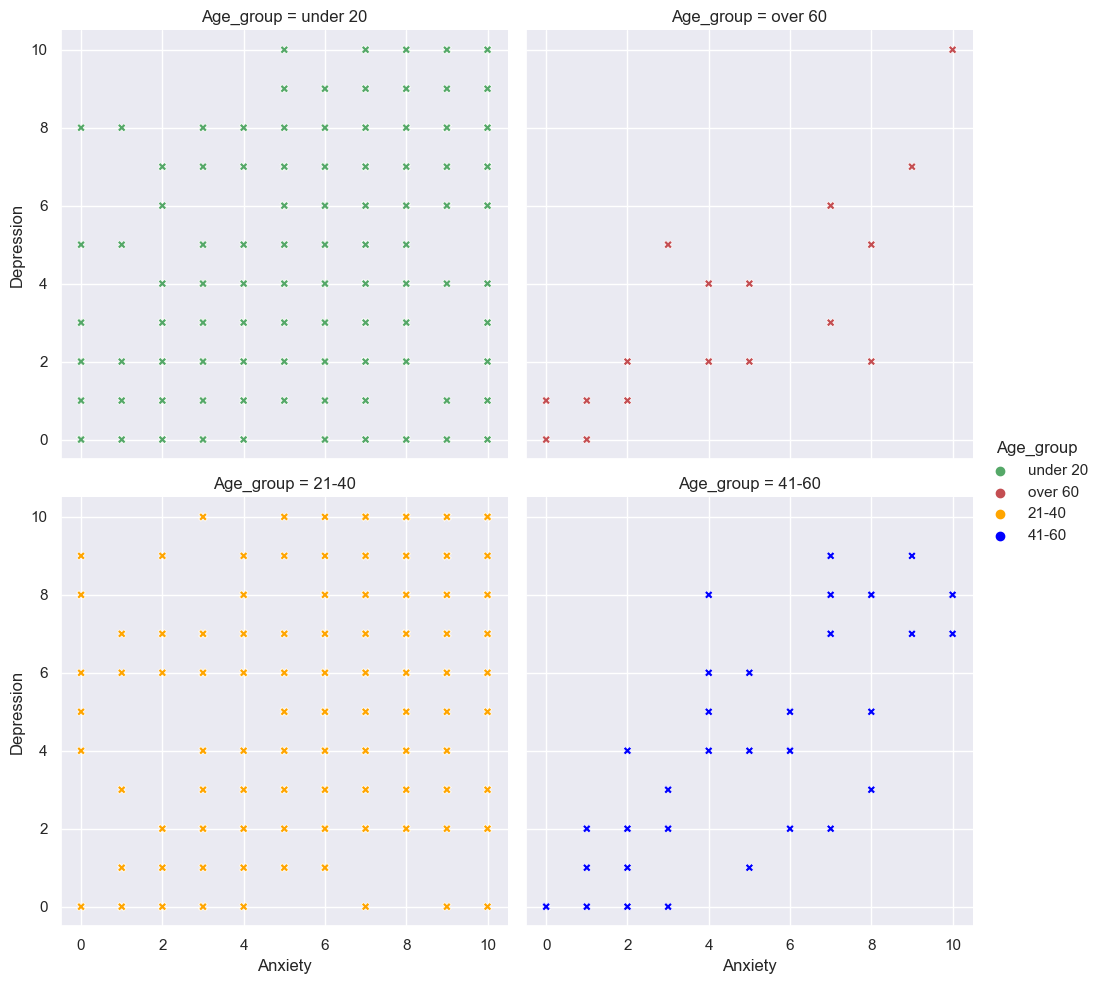

In [49]:
sns.relplot(data = music_health_df, x="Anxiety", y="Depression", hue = "Age_group", col = "Age_group", kind="scatter", 
col_wrap = 2, palette = ["g", "r", "orange", "blue"], marker = "X")
plt.show()

I investigate the linear relationship between anxiety and depression:

In [103]:
#creation of train and test for x and y
x_train = music_health_df.loc[music_health_df["Age_group"] == "over 60","Anxiety"].loc[::2]
y_train = music_health_df.loc[music_health_df["Age_group"] == "over 60","Depression"].loc[::2]
x_test = music_health_df.loc[music_health_df["Age_group"] == "over 60","Anxiety"].loc[2::2]
y_test = music_health_df.loc[music_health_df["Age_group"] == "over 60","Depression"].loc[2::2]

In [104]:
def straight_line(x, m, q): #function that creates a straight line
  return (m*x)+q

def show_plot(y_train, model): #functions that plots the model with my data
  plt.scatter(music_health_df.loc[music_health_df["Age_group"] == "over 60","Anxiety"], music_health_df.loc[music_health_df["Age_group"] == "over 60","Depression"])
  plt.plot(x_train, model, "red")
  plt.show()

In [105]:
def squared_error(y, model): #function to compute the squared error
  e = y - model
  sq_e = e**2
  return sum(sq_e)

In [106]:
def fit(y_train, m, q, steps = 200, epsilon = 0.01):  #function that findas the combination of m and q that minimize the squared error
  model = straight_line(x_train, m, q)
  sq_e = squared_error(y_train, model)
  print("Initial error:", sq_e)
  for i in range(steps):
    m_ = m + (np.random.choice([1,-1], size = 1)*epsilon) 
    q_ = q + (np.random.choice([1,-1], size = 1)*epsilon) #in each step I change the slope and the intercept of + or - epsilon
    model_ = straight_line(x_train, m_, q)
    sq_e_ = squared_error(y_train, model_)
    if sq_e_ < sq_e: #I proceed until the error is minimized
      m = m_
      q = q_
      sq_e = sq_e_
  print("Final error:", sq_e)
  return m, q

Initial error: 49
Final error: 26.406709


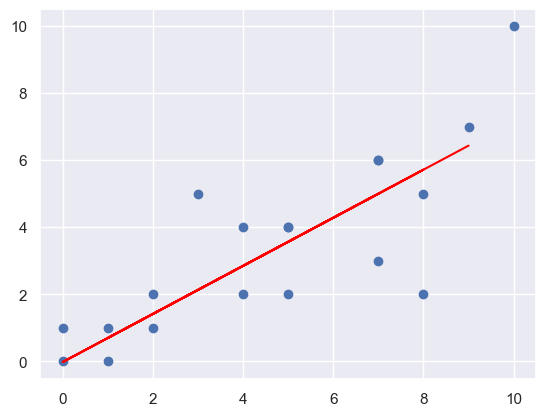

In [107]:
#I start with m = 1 and q = 0 because they seem reasonable values
m, q = fit(y_train, 1 , 0, steps = 2000, epsilon = 0.001)
model = straight_line(x_train, m, q)
show_plot(y_train, model)

In [108]:
m, q

(array([0.717]), array([-0.021]))

Now I have to validate the model

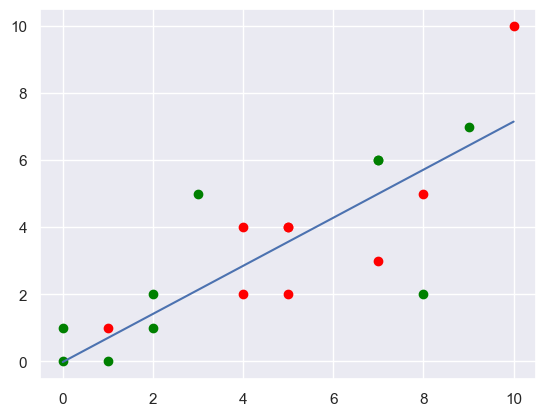

In [120]:
plt.scatter(x_train, y_train, c = "green")
plt.scatter(x_test, y_test, c='red')
x = np.arange(len(y_train)+1)
model = straight_line(x, m, q)
plt.plot(model)

In [109]:
y_pred = straight_line(x_test, m, q)
squared_error(y_test, y_pred)

17.596952000000005

In [145]:
new_dataset = music_health_df
new_dataset.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer
0,18,4,1,1,1
1,61,2,0,1,0
2,18,4,0,1,1
3,18,5,0,0,0
4,18,3,0,0,1


In [143]:
new_dataset.drop(new_dataset.columns[6:27], axis = 1, inplace = True)
new_dataset.drop(new_dataset.columns[-1], axis = 1, inplace = True)
new_dataset.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer
0,18,4,1,1,1
1,61,2,0,1,0
2,18,4,0,1,1
3,18,5,0,0,0
4,18,3,0,0,1


In [133]:
music_health_df.groupby(["Music_effects"]).sum()

C:\Users\sanfe\AppData\Local\Temp\ipykernel_25168\886355642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  music_health_df.groupby(["Music_effects"]).sum()


,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Metal,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD
Music_effects,,,,,,,,,,,,,,,,,,,,,
0,4458,574,55,127,148,67,232,213,303,188,...,272,201,242,249,260,267,850,740,607,398
1,13340,1941,92,351,436,131,711,726,890,604,...,846,724,824,813,854,914,3256,2610,2011,1462
2,385,46,6,13,15,7,22,18,30,15,...,23,23,28,26,29,22,115,122,77,53


In [125]:
music_health_df["Music_effects"].value_counts()

1    539
0    167
2     17
Name: Music_effects, dtype: int64